This notebook loads csv files generated from two simulations of a protein.
Each csv contains time-averaged properties such as Rg (radius of gyration) and RMSF (root mean square fluctuations) for tens of proteins. Each line of the csv represents on protein.

We would like to predict which proteins will fold (e.g. have an RgEnd below a cutoff value of say 18), based on properties reported in this csv file. 
Note that the RgEnd is an output, not a feature used for the prediction. 

Ultimately, I load the data, create a new property called 'isFolded' and proceed to separate the data into inputs (X) and outputs (Y), of which the latter corresponds to the isFolded property value (True/False). X is informed from a feature set defined below. 

I used a decision tree as one of many machine learning approaches that can be tested. 

For the time being, the traj*_scored.csv files will be stored in the repo along with the code


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

#### Loading data sets

In [19]:
dfa = pd.read_csv( "traj3_scored.csv" )
len(dfa.index)

dfb = pd.read_csv( "traj7_scored.csv" )
len(dfb.index)



30

### Apply threshold criterion 

In [27]:
print(dfb['RgEnd'])

0      13.891812
1     174.263057
2      16.410462
3     178.066396
4     151.554205
5      13.484959
6      15.360718
7     176.695470
8      14.193749
9     120.995689
10    108.994120
11     74.129974
12     14.813795
13    139.617322
14     16.363539
15     16.333668
16    154.694029
17    192.441239
18     17.950405
19     16.259707
20    100.432030
21     15.919946
22    164.822285
23     17.493969
24     45.503809
25    126.871966
26     15.995430
27     14.200436
28    159.569586
29     14.919298
Name: RgEnd, dtype: float64


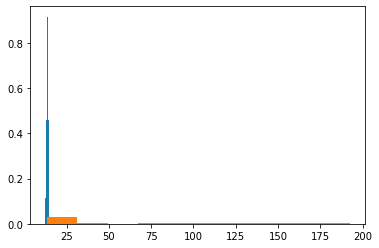

In [29]:
plt.hist(dfa['RgEnd'],density=True,label="pH3")
plt.hist(dfb['RgEnd'],density=True,label="pH7")

cutoff = 18.

In [30]:
df = pd.concat([dfa,dfb])
df['isFolded']=np.where(df['RgEnd']<cutoff,True,False)


### Create inputs/outputs for ML
We wish to use scalar data, so we are just going to select a subset of features here

In [31]:
feature_cols = ["RgHist","RgStart","RgEnd","RMSF","negative"]
#feature_cols = ["RgStart","RgEnd"]
X = df[feature_cols]
y = df.isFolded

### Learning
borrowed from https://www.datacamp.com/tutorial/decision-tree-classification-python

In [32]:
import sklearn 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [33]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, random_state=1) 

In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


### Display

In [36]:
!pip3 install six

In [37]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [38]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

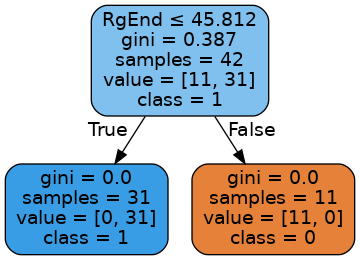

In [39]:
#graph.write_png('diabetes.png')
Image(graph.create_png())